# Первичный и визуальный анализ данных
- выгрузка данных
- основные харакетристики переменных в численном и визуальном представлении
- взаимодействие между параметрами (корреляция и прочее)
- проверка на нормальность
- обработка пропусков в данных
- закономерности, "инсайты", особенности данных

### Выгрузим данные и сразу же посмотрим на их характеристики и избавимся от лишнего.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
from pylab import rcParams
from statistics import median
from matplotlib import pyplot as PLT


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

<div class="alert-success">
Там же кстати есть и другие файлы на кагле, они по другим регионам?
</div>

In [2]:
df = pd.read_csv('E:/123/region25_en.csv')

In [3]:
df.head()

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,parse_date
0,Fiat,124 Spider,open,blue,Gasoline,NaN,8000.0,Automatic,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/fiat/124_spider/47...,2022-08-20 04:00:00
1,BMW,i3,hatchback 5 doors,black,Electro,NaN,12000.0,Automatic,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/bmw/i3/47958301.html,2022-08-20 04:00:00
2,Mercedes-Benz,GLE Coupe,jeep 5 doors,burgundy,Gasoline,2015.0,57000.0,AT,367.0,4600000,450 AMG 4MATIC Особая серия,M 276 DE 30 AL,3.0 LTR,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/mercedes-benz/gle_...,2022-08-20 04:00:00
3,Mercedes-Benz,G-Class,jeep 5 doors,black,Gasoline,2002.0,200000.0,AT,296.0,2999999,G 500,M 113 E 50,5.0 LTR,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/mercedes-benz/g-cl...,2022-08-20 04:00:00
4,Audi,Q7,jeep 5 doors,white,Gasoline,NaN,67000.0,Automatic,252.0,3300000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/audi/q7/46498184.html,2022-08-20 04:00:00


Сразу видно "NaN" - это пропуск. Т.к. в датасете оочень много записей (1.5м), то я решил удалить записи с пропусками.




<div class="alert-success">
Можно позже за счет этого попробовать улучшить работу модели - например заменить пропуски медианным значением 
</div>

In [4]:
df = df.dropna()
print(df.shape)

(1002096, 17)


Остался миллион, я считаю вполне неплохо.

Посмотрим на характеристики стобцов, чтобы, возможно, понять, какие нам не нужны.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002096 entries, 2 to 1513199
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   brand                 1002096 non-null  object 
 1   name                  1002096 non-null  object 
 2   bodyType              1002096 non-null  object 
 3   color                 1002096 non-null  object 
 4   fuelType              1002096 non-null  object 
 5   year                  1002096 non-null  float64
 6   mileage               1002096 non-null  float64
 7   transmission          1002096 non-null  object 
 8   power                 1002096 non-null  float64
 9   price                 1002096 non-null  int64  
 10  vehicleConfiguration  1002096 non-null  object 
 11  engineName            1002096 non-null  object 
 12  engineDisplacement    1002096 non-null  object 
 13  date                  1002096 non-null  object 
 14  location              1002096 non-

Очень много объектов, это плохо, но исправимо очень легко (далее). Пока что я выведу ещё 1 таблицу, которая поможет мне кое-что объяснить.

In [6]:
df.describe(include=['object'])

,brand,name,bodyType,color,fuelType,transmission,vehicleConfiguration,engineName,engineDisplacement,date,location,link,parse_date
count,1002096,1002096,1002096,1002096,1002096,1002096,1002096,1002096,1002096,1002096,1002096,1002096,1002096
unique,61,840,11,15,2,4,7595,1117,55,39,69,31437,773
top,Toyota,Land Cruiser Prado,jeep 5 doors,white,Gasoline,CVT,1.8 S,2ZR-FXE,1.5 LTR,2022-09-10 00:00:00,Vladivostok,https://vladivostok.drom.ru/toyota/harrier/473...,2022-09-13 12:00:00
freq,479512,51623,350766,325555,919005,476604,13553,60172,193333,34640,598653,758,2666


Обратим внимание на строку "unique" - кол-во уникальных значений. Судя по ней, нам очень не хотелось бы иметь дело с признаком 'link' (оно и логично - она отвечает за ссылку на объявление о продаже, оно нам не надо). 'parse_date' - тоже смысла не несёт. Также по-своему желанию, я уберу столбец 'date', ибо я считаю, что дата появления объявления роли не играет (для покупателя). У нас куча других, более интересных признаков.

In [7]:
df = df.drop(['date', 'link', 'parse_date'], axis='columns')


Для удобства и правильности заменим все "слова" на соответствующие числа методом lebelencoder.

<div class="alert-success">
На данном этапе можно пока не кодировать категориальные перменные, так будет проще воспринимать гистограммы по ним
    
А кодирование понадобится позже
</div>

In [8]:
# le = LabelEncoder()
# df['brand'] = le.fit_transform(df['brand'])
# df['name'] = le.fit_transform(df['name'])
# df['bodyType'] = le.fit_transform(df['bodyType'])
# df['color'] = le.fit_transform(df['color'])
# df['fuelType'] = le.fit_transform(df['fuelType'])
# df['transmission'] = le.fit_transform(df['transmission'])
# df['vehicleConfiguration'] = le.fit_transform(df['vehicleConfiguration'])
# df['engineName'] = le.fit_transform(df['engineName'])
# df['engineDisplacement'] = le.fit_transform(df['engineDisplacement'])
# df['location'] = le.fit_transform(df['location'])

<div class="alert-success">
Не забыть перевести такие переменные как год в тип int (у меня был как float)
    
это тоже может сказаться на качестве моделей
</div>

In [9]:
df.year = df.year.astype('int')

In [10]:
df.describe()

,year,mileage,power,price
count,1.002096e+06,1.002096e+06,1.002096e+06,1.002096e+06
mean,2.010003e+03,1.293117e+05,1.503345e+02,1.480023e+06
std,7.647055e+00,8.273943e+04,7.318643e+01,1.681752e+06
min,1.943000e+03,1.000000e+03,3.000000e+01,2.000000e+04
25%,2.006000e+03,6.900000e+04,1.000000e+02,5.600000e+05
50%,2.012000e+03,1.200000e+05,1.360000e+02,9.450000e+05
75%,2.016000e+03,1.800000e+05,1.770000e+02,1.800000e+06
max,2.022000e+03,1.000000e+06,6.250000e+02,4.150000e+07


<div class="alert-success">
Вот пример, найдем долю каждого бренда в выборке и выберем только те, для которых есть объектов более 1% процента от всей выборки
</div>
`normalize=True` - для нахождения доли, а не просто кол-ва

In [11]:
freq_brand = df.brand.value_counts(normalize=True)
most_freq_brand = freq_brand[freq_brand>0.01].index
most_freq_brand

Index(['Toyota', 'Honda', 'Nissan', 'Lexus', 'Subaru', 'Mitsubishi', 'Suzuki',
       'Mazda', 'Mercedes-Benz', 'Daihatsu', 'BMW'],
      dtype='object')

In [12]:
print(f'Размер датасета:{df.shape}')

df = df[df['brand'].isin(most_freq_brand)]
print(f'Размер датасета:{df.shape}')

Размер датасета:(1002096, 14)
Размер датасета:(954478, 14)


<AxesSubplot:>

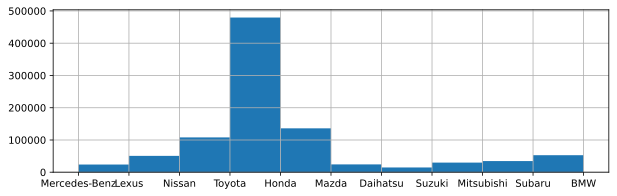

In [13]:
df.brand.hist()

In [14]:
df = df.loc[df['year'] >= 1992]

<AxesSubplot:>

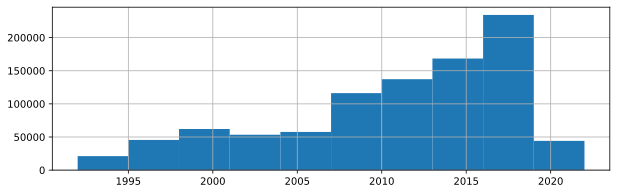

In [15]:
df.year.hist()

<AxesSubplot:>

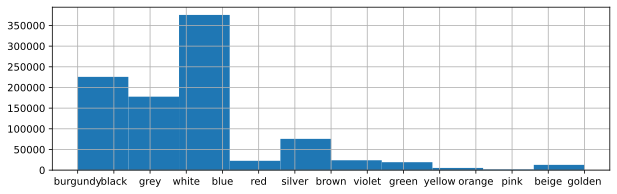

In [16]:
df.color.hist()

<div class="alert-success">
Города нужно попробовать разделить на некоторые группы - например, по числу проживающего населения или средней зарплате, потому что в зависимости от того, какого размера город, какая средняя зп по городу, цены на автомобиль могут быть выше или ниже
    
то есть - нужно придумать некоторую группировку - за счет этого и удасться произвести фильтрацию
</div>

### Визуализация и анализ данных.

<div class="alert-success">
    
Пока закоментировала вот эту часть, чтобы попробовать обучить модель на сырых данных
    
Чтобы быстро раскомментировать - выделить строки и нажать (ctrl+/ или cmd+/)
</div>

Данные готовы к работе и дальнейшим преобразованиям. Теперь попробуем с помощью различных графиков определить, что нам важно, а что нет. Дабы избежать громоздкости, я начну с самого важного - корреляции.

In [17]:
# sns.set(rc = {'figure.figsize':(12,8)})
# sns.heatmap(df.corr(), xticklabels=df.corr().columns, 
#             yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

Эта визуализированная матрица корреляций позволяет сделать много выводов. Но в моём случае вывод 1, признаки "power" и "engineDisplacement" коррелируют с коэффициентом 0.83 - это довольно сильно (что и логично в реальности, это мощность и объём двигателя), поэтому объём двигателя лучше убрать.

In [18]:
# df = df.drop(['engineDisplacement'], axis='columns')

In [19]:
# sns.set(rc = {'figure.figsize':(12,8)})
# sns.heatmap(df.corr(), xticklabels=df.corr().columns, 
#             yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

Более ничего убирать не будем. Посмотрим на распределения величин.

In [20]:
# fig = PLT.figure(figsize = (10,12))

# fig1 = fig.add_subplot(7,2,1)
# fig1 = sns.histplot(df['brand'], bins = 10)

# fig2 = fig.add_subplot(7,2,2)
# fig2 = sns.histplot(df['name'], bins =10)

# fig3 = fig.add_subplot(7,2,3)
# fig3 = sns.histplot(df['bodyType'], bins =10)

# fig4 = fig.add_subplot(7,2,4)
# fig4 = sns.histplot(df['color'], bins =10)

# fig5 = fig.add_subplot(7,2,5)
# fig5 = sns.histplot(df['fuelType'], bins =2)

# fig6 = fig.add_subplot(7,2,6)
# fig6 = sns.histplot(df['year'], bins =10)

# fig7 = fig.add_subplot(7,2,7)
# fig7 = sns.histplot(df['mileage'], bins = 10)

# fig8 = fig.add_subplot(7,2,8)
# fig8 = sns.histplot(df['transmission'], bins = 4)

# fig9 = fig.add_subplot(7,2,9)
# fig9 = sns.histplot(df['power'], bins =10)

# fig10 = fig.add_subplot(7,2,10)
# fig10 = sns.histplot(df['price'], bins = 100)

# fig11 = fig.add_subplot(7,2,11)
# fig11 = sns.histplot(df['vehicleConfiguration'], bins = 10)

# fig12 = fig.add_subplot(7,2,12)
# fig12 = sns.histplot(df['engineName'], bins = 10)

# fig13 = fig.add_subplot(7,2,13)
# fig13 = sns.histplot(df['location'], bins = 10)

# fig.tight_layout()

Нормальным распределением и не пахнет ни у одного признака, попробуем убрать выбросы, на которые сейчас взглянем. Делаю boxplot'ы отдельно, ибо если всё сделать вмсете комп не выдержит, слишком много выбросов в некоторых признаках. Я выведу сразу те графики где выбросы есть. (Вставляю готовые, т.к. если брать несохранённые изображения, то очень сильно лагает).

FuelType

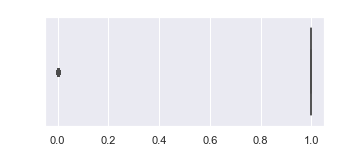

Year

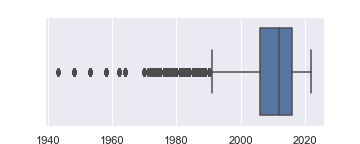

Mileage

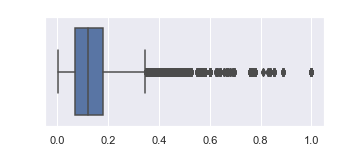

Transmission

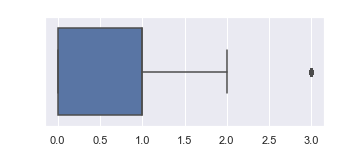

Power

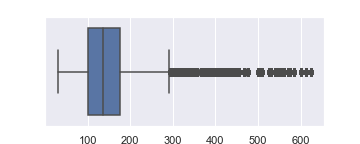

Price

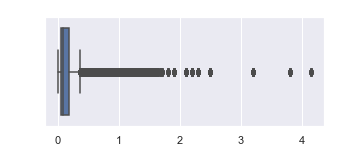

Location

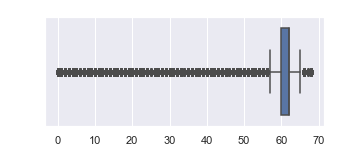

amb = np.where(df['location'] < 57)

# Попробуем обучить модель CatBoost на сырых данных

In [21]:
#!pip install catboost
#!pip install sklearn

In [22]:
import catboost as cb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'catboost'

In [ ]:
categorical_indicies = ['brand', 'name', 'bodyType', 'color', 'fuelType', 'year',
       'transmission', 'vehicleConfiguration', 'engineName',
       'engineDisplacement', 'location']

In [ ]:
X = df.drop('price', axis=1)
y = df['price']


<div class="alert-success">

Разделяем выборку на обучающую и тестовую
</div>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

<div class="alert-success">

Использую [catboost](https://catboost.ai/en/docs/) - бустинг на деревьях, который особенным образом работает с категориальными признаками - а в это задачке их много
</div>

In [ ]:
train_dataset = cb.Pool(X_train, y_train, cat_features=categorical_indicies)
test_dataset = cb.Pool(X_test, y_test, cat_features=categorical_indicies)

In [ ]:
model = cb.CatBoostRegressor(loss_function='RMSE', 
                            learning_rate=1)

<div class="alert-success">
Обучалась модель небыстро, где-то 7 минут, но ошибка продолает уменьшаться, то есть можно ставить на большее кол-во итераций, но может переобучиться...
</div>

%%time - в начале ячеки позволит замерить время выполнения

In [ ]:
%%time
model.fit(train_dataset)

<div class="alert-success">
Поиск по сетке, уже позже может понадобиться для более точной настройки параметров, пока просто любые выбрали
</div>

In [ ]:
# grid = {'iterations': [150, 200],
#         'learning_rate': [0.03, 0.1],
#         'depth': [4, 6],
#         'l2_leaf_reg': [0.5, 1]}
# model.grid_search(grid, train_dataset)

In [ ]:
pred = model.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

In [ ]:
df_result = pd.DataFrame(y_test)
df_result['price_predict'] = pred

In [ ]:
df_result

<div class="alert-success">
    
Просто взяли наши сырые данные, без дополнительной настройки гипперпараметров получили RMSE=122000 рубля - сходу, кажется, что можем уменьшить до RMSE=60000
    
и R2 = 0.9 - говорит о том, что наша модель хорошо объясняет дисперсию нашей выборки (вот по этой метрике модель хорошо работает!)
</div>